In [1]:
import sys
import os

# Ajouter le chemin du dossier src au sys.path
sys.path.append(os.path.abspath('../aci'))

import xarray as xr
import droughtcomponent as dc
import precipitationcomponent as pc
import windcomponent as wc
import temperaturecomponent as tc
import sealevel as sl
import matplotlib.pyplot as plt
import seaborn as sns

Le dossier rlr_monthly existe déjà. Aucune action nécessaire.


In [2]:
precip_component = pc.PrecipitationComponent("../data/required_data/1960-1970/ResPartOfParis_total_precipitation_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")


In [3]:
prec = precip_component.calculate_monthly_max_anomaly("tp", 5, ('1960-01-01', '1964-12-31'))

prec


/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


<xarray.DataArray 'tp' (latitude: 5, longitude: 9, time: 120)>
array([[[-0.5041716 , -0.28366452,  1.7213148 , ..., -2.8188667 ,
         -0.26017442,  0.12394263],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.04087852,  0.32170302,  1.3278244 , ..., -2.0561087 ,
         -0.45385608,  0.4996464 ],
        ...,
        [ 1.0228119 , -0.0278642 ,  0.22594203, ..., -3.0471094 ,
          0.4182715 , -0.5686015 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.67802584, -0.12785509,  0.67893505, ..., -2.6096263 ,
          1.2539304 , -0.36351138]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.4036206 ,  0.65879333,  0.07585744, ..., -2.4617078 ,
          1.2934781 , -0.6244917 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.20979877,  1.2209576 ,  0.28455412, ..., -1.8692443 ,
          0.9999703 ,  0.6223117 ],
        ...,
        [ 0.6750641 ,  0.13064696,  0.40764907, ..., -3.9849362 ,
          0.57707804, -0.55218846],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.6297373 , -0.51942277, -0.09517366, ..., -3.331495  ,
          0.74056137, -0.45809445]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

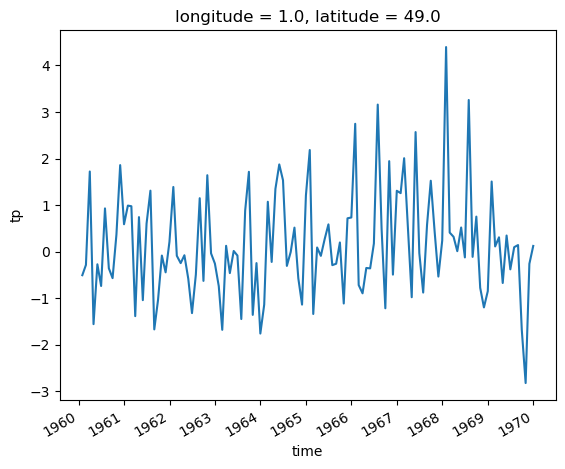

In [4]:
prec.isel(latitude=0, longitude= 0).plot()


/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


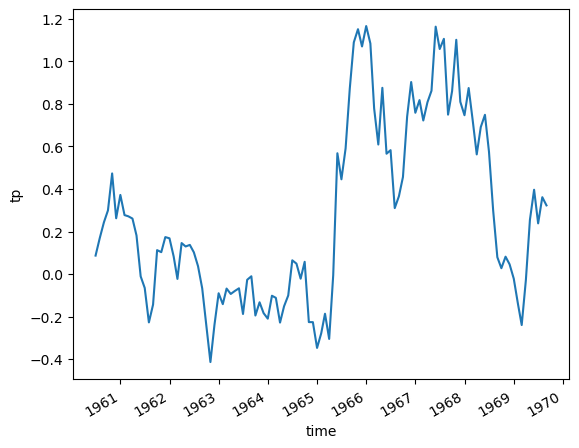

In [5]:
val = precip_component.calculate_monthly_max_anomaly("tp", 5, ('1960-01-01', '1964-12-31'), True)

val.rolling(time=10,center=True).mean().plot()

In [6]:


## Corriger l'erreur de la composante du vent. 

wind_component = wc.WindComponent("../data/required_data/1960-1970/ResPartOfParis_10m_u_component_of_wind_1960-1970.nc", "../data/required_data/1960-1970/ResPartOfParis_10m_v_component_of_wind_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")

wind = wind_component.standardize_wind_exceedance_frequency(('1960-01-01', '1964-12-31'))


/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


In [7]:
wind

<xarray.DataArray (latitude: 5, longitude: 9, time: 120)>
array([[[-0.53925985, -0.37873335, -0.36288737, ..., -2.2453656 ,
          1.4226567 , -1.11417203],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.40492914, -0.36496834, -0.4271211 , ..., -2.24780595,
          0.95399809, -0.0805823 ],
        ...,
        [-0.43707864, -0.29968542, -0.4938648 , ..., -2.07328422,
          1.125     , -1.00899568],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.61556784, -0.27293815, -0.51987524, ..., -1.86253229,
          0.9009982 , -0.87705802]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.17739372, -0.246258  , -0.60583925, ..., -2.38365647,
          0.69748583, -0.6799001 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.29880715,  0.06839011, -0.60583925, ..., -2.59973473,
          1.13224412, -0.96076892],
        ...,
        [-0.44307902,  0.42292837, -0.48224282, ..., -2.71609885,
          2.17043413, -1.16554303],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.4271211 ,  0.5124819 , -0.11624764, ..., -2.31729649,
          1.67140798, -1.11417203]]])
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

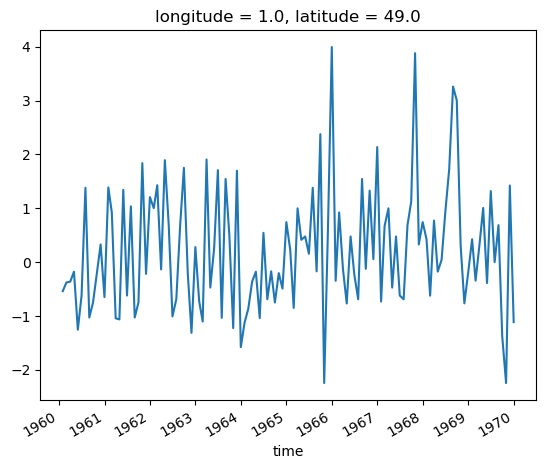

In [8]:
wind.isel(latitude = 0, longitude = 0).plot()

/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


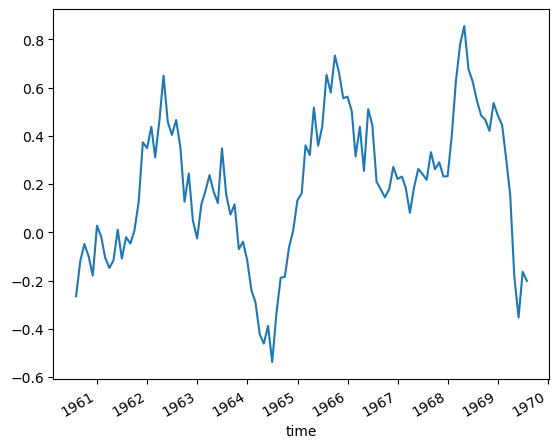

In [9]:
val = wind_component.standardize_wind_exceedance_frequency(('1960-01-01', '1964-12-31'), True)

val.rolling(time=12,center=True).mean().plot()

In [10]:
### # Sécheresse

drought_component = dc.DroughtComponent("../data/required_data/1960-1970/ResPartOfParis_total_precipitation_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")

#val = drought_component.calculate_max_consecutive_dry_days()
cdd = drought_component.standardize_max_consecutive_dry_days(('1960-01-01', '1964-12-31'))

/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


In [11]:
cdd

<xarray.DataArray 'days_below_thresholds' (latitude: 5, longitude: 9, time: 120)>
array([[[-1.56892908, -0.56195149,  0.75482941, ..., -2.44120041,
          0.91766294, -0.44232587],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.58113883, -0.56195149,  1.19522861, ..., -1.38218948,
         -0.55901699,  1.03209369],
        ...,
        [ 1.02899151, -0.98782916,  1.16554303, ..., -1.53644256,
         -2.54950976,  0.60302269],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.11803399, -0.86474714,  1.56892908, ..., -1.08465229,
         -3.25847312,  0.40089186]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.02899151, -0.54433105, -0.11624764, ..., -0.67042381,
          0.08333333, -1.75      ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.68599434, -0.5       , -0.11624764, ..., -0.98782916,
          0.81649658, -1.56892908],
        ...,
        [ 1.56892908, -0.27854301, -0.75      , ..., -1.4509525 ,
          0.92827912,  1.88648444],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 1.56892908,  0.24019223, -0.81649658, ..., -1.4509525 ,
          1.58113883,  1.91674543]]])
Coordinates:
  * time       (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
  * longitude  (longitude) float32 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 48.0

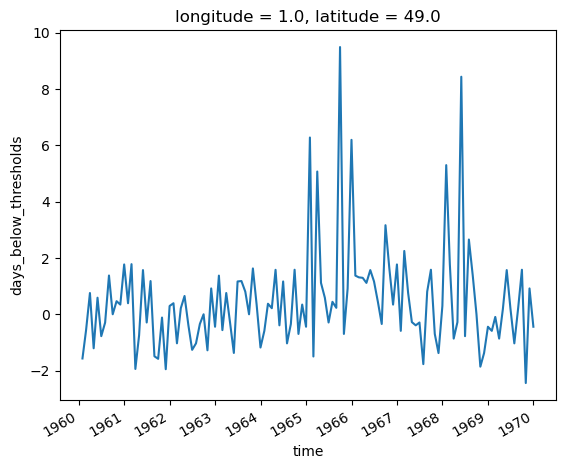

In [12]:
cdd.isel(latitude=0 , longitude =0).plot()

/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


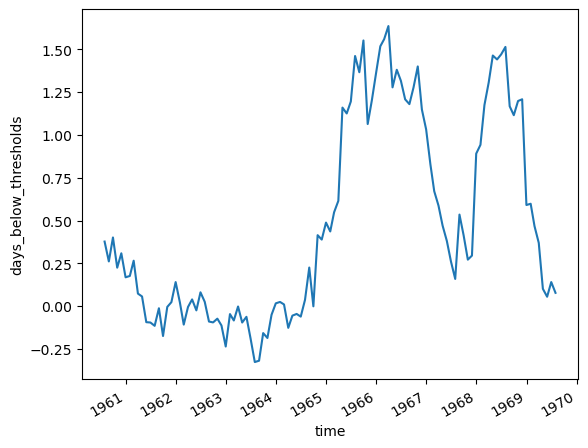

In [13]:
val = drought_component.standardize_max_consecutive_dry_days(('1960-01-01', '1964-12-31'), True)
val.rolling(time=12,center=True).mean().plot()

In [2]:
temp_component = tc.TemperatureComponent("../data/required_data/1960-1970/ResPartOfParis_2m_temperature_1960-1970.nc", "../data/required_data/countries_gridded_0.1deg_v0.1_FRo.nc")


In [3]:
val90 = temp_component.std_t90_month(('1960-01-01', '1964-12-31'), True)
val10 = temp_component.std_t10_month(('1960-01-01', '1964-12-31'), True)

/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/python3.9/site-packages/xarray/core/groupby.py:345: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/dabakh/miniconda3/envs/myenv/lib/p

In [4]:
val90

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
Data variables:
    t2m      (time) float64 0.3775 0.03083 0.05457 ... 7.352 0.5462 1.427

In [5]:
val10

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 1969-12-31
Data variables:
    t2m      (time) float64 -0.2949 0.002319 -1.113 ... 0.6187 1.952 0.5978

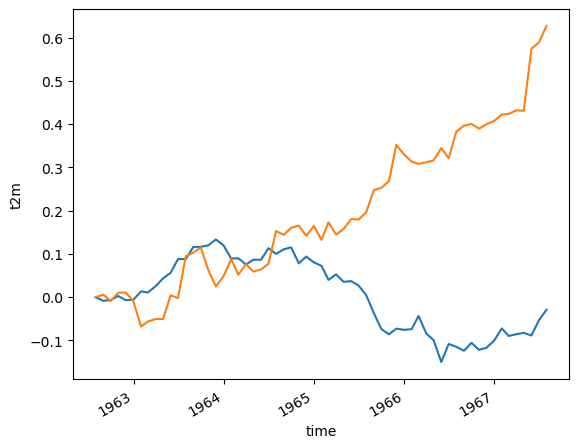

In [6]:
temp_component.plot_components(val10, val90, 60)

In [19]:
sea_level_component = sl.SeaLevelComponent("FRA", ('1960-01-01', '1969-12-31'), ('1960-01-01', '1964-12-31')  )

In [20]:
niv_mer = sea_level_component.process()

<Axes: xlabel='Corrected_Date'>

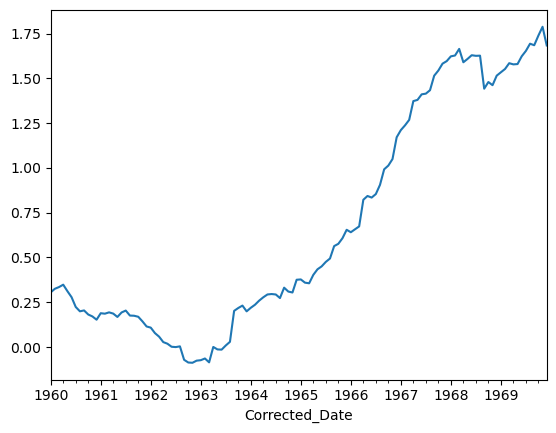

In [21]:
car = sea_level_component.convert_to_xarray(niv_mer)
#car
#car.rolling(index=60, center=True).mean().plot()
a= niv_mer.mean(axis=1)
a.rolling(window=60, min_periods=12, center=True).mean().plot()